In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Загружаем png

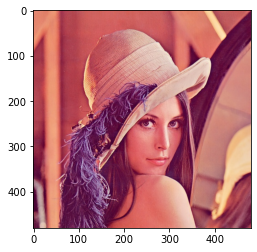

In [2]:
img = cv2.imread("C:\Photo1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Алгоритм обнаружения лица

In [8]:
path = 'D:\\anaconda\\pkgs\\libopencv-4.0.1-hbb9e17c_0\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray_image, 1.1, 5)
face.shape

(1, 4)

Выберем элемет картинки с лицом

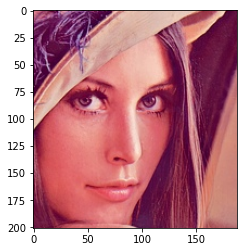

In [11]:
face_image = img[face[0][2]:face[0][0] + face[0][3], face[0][0]:face[0][0] + face[0][1]] 

plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

Алгоритм Кенни

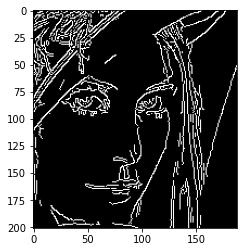

In [12]:
gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
bounds = cv2.Canny(gray_image, 100, 200)

plt.imshow(bounds,cmap="gray")

Увеличиваем границы 

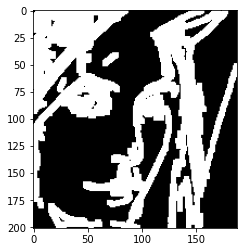

In [13]:
kernel = np.ones((5, 5), dtype=np.uint8)
dilated = cv2.dilate(bounds, kernel, 1)

plt.imshow(dilated,cmap="gray")

Медианный филтр

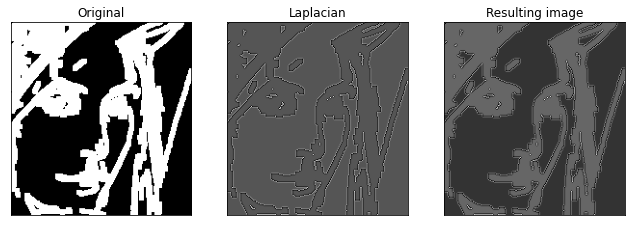

In [66]:
new_image = cv2.Laplacian(dilated,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), 
plt.imshow(dilated, cmap='gray'),
plt.title('Original')
plt.xticks([]), 
plt.yticks([])
plt.subplot(132), 
plt.imshow(new_image, cmap='gray'),
plt.title('Laplacian')
plt.xticks([]), 
plt.yticks([])
plt.subplot(133),
plt.imshow(dilated + new_image, cmap='gray'),
M = dilated + new_image
plt.title('Resulting image')
plt.xticks([]), 
plt.yticks([])
plt.show()

Билатеральный фильтр

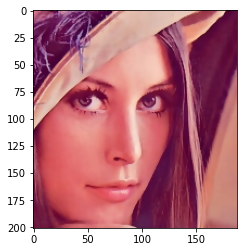

In [25]:
F1 = cv2.bilateralFilter(crop_image, 5, 50, 100)

plt.imshow(cv2.cvtColor(F1, cv2.COLOR_BGR2RGB))

Повышаем яркость 

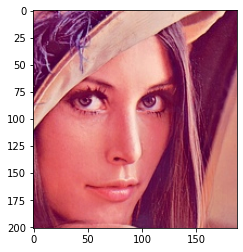

In [71]:
hsv = cv2.cvtColor(face_image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v = cv2.add(v,5)
v[v > 255] = 255
v[v < 0] = 0
final_hsv = cv2.merge((h, s, v))
new_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

Объединенны фильтр

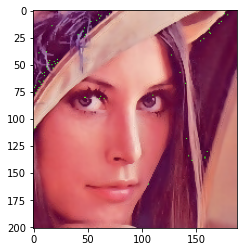

In [72]:
result = np.zeros(face_image.shape, dtype=np.uint8)
w, h, channel = result.shape

for x in range(0, w):
    for y in range(0, h):
        for c in range(0, channel):
            result[x, y, c] = M[x, y] * new_img[x, y, c] + (1 - M[x, y]) * F1[x, y, c]
            
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))